In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Root Mean Square Percentage Error (RMSPE)
def calculate_accuracy(real, predict):
    real = np.array(real)
    predict = np.array(predict)
    percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))
    return percentage * 100

test_size = 20

In [4]:
results = np.load('aapl_lstm.npy')
results2 = np.load('aapl_lstm_bid.npy')
results3 = np.load('aapl_lstm_sum.npy')
results4 = np.load('aapl_gru.npy')
results5 = np.load('aapl_gru_bid.npy')
results6 = np.load('aapl_gru_sum.npy')
results7 = np.load('aapl_vrnn.npy')
results8 = np.load('aapl_vrnn_bid.npy')
results9 = np.load('aapl_vrnn_sum.npy')
results10 = np.load('aapl_seq2seq.npy')
results11 = np.load('aapl_seq2seq_bid.npy')
results12 = np.load('aapl_seq2seq_vae.npy')
results13 = np.load('aapl_gru_seq2seq.npy')
results14 = np.load('aapl_grubid_seq2seq.npy')
results15 = np.load('aapl_gruvae_seq2seq.npy')
df = np.load('aapl.npy')
df = pd.DataFrame(data=df, columns=["4. close"])

In [5]:
a1 = np.mean(results, axis=0)
a2 = np.mean(results2, axis=0)
a3 = np.mean(results3, axis=0)
a4 = np.mean(results4, axis=0)
a5 = np.mean(results5, axis=0)
a6 = np.mean(results6, axis=0)
a7 = np.mean(results7, axis=0)
a8 = np.mean(results8, axis=0)
a9 = np.mean(results9, axis=0)
a10 = np.mean(results10, axis=0)
a11 = np.mean(results11, axis=0)
a12 = np.mean(results12, axis=0)
a13 = np.mean(results13, axis=0)
a14 = np.mean(results14, axis=0)
a15 = np.mean(results15, axis=0)
a = [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15]

In [6]:
best1 = results[4]
best2 = results2[4]
best3 = results3[4]
best4 = results4[4]
best5 = results5[4]
best6 = results6[4]
best7 = results7[4]
best8 = results8[4]
best9 = results9[4]
best10 = results10[4]
best11 = results11[4]
best12 = results12[4]
best13 = results13[4]
best14 = results14[4]
best15 = results15[4]

In [7]:
results_lr = np.load('aapl_lstm_lr.npy')
results2_lr = np.load('aapl_lstm_bid_lr.npy')
results3_lr = np.load('aapl_lstm_sum_lr.npy')
results4_lr = np.load('aapl_gru_lr.npy')
results5_lr = np.load('aapl_gru_bid_lr.npy')
results6_lr = np.load('aapl_gru_sum_lr.npy')
results7_lr = np.load('aapl_vrnn_lr.npy')
results8_lr = np.load('aapl_vrnn_bid_lr.npy')
results9_lr = np.load('aapl_vrnn_sum_lr.npy')
results10_lr = np.load('aapl_seq2seq_lr.npy')
results11_lr = np.load('aapl_seq2seq_bid_lr.npy')
results12_lr = np.load('aapl_seq2seq_vae_lr.npy')
results13_lr = np.load('aapl_gru_seq2seq_lr.npy')
results14_lr = np.load('aapl_grubid_seq2seq_lr.npy')
results15_lr = np.load('aapl_gruvae_seq2seq_lr.npy')

In [8]:
a1_lr = np.mean(results_lr, axis=0)
a2_lr = np.mean(results2_lr, axis=0)
a3_lr = np.mean(results3_lr, axis=0)
a4_lr = np.mean(results4_lr, axis=0)
a5_lr = np.mean(results5_lr, axis=0)
a6_lr = np.mean(results6_lr, axis=0)
a7_lr = np.mean(results7_lr, axis=0)
a8_lr = np.mean(results8_lr, axis=0)
a9_lr = np.mean(results9_lr, axis=0)
a10_lr = np.mean(results10_lr, axis=0)
a11_lr = np.mean(results11_lr, axis=0)
a12_lr = np.mean(results12_lr, axis=0)
a13_lr = np.mean(results13_lr, axis=0)
a14_lr = np.mean(results14_lr, axis=0)
a15_lr = np.mean(results15_lr, axis=0)
a_lr = [a1_lr, a2_lr, a3_lr, a4_lr, a5_lr, a6_lr, a7_lr, a8_lr, a9_lr, a10_lr, a11_lr, a12_lr, a13_lr, a14_lr, a15_lr]

In [9]:
best1_lr = results_lr[4]
best2_lr = results2_lr[4]
best3_lr = results3_lr[4]
best4_lr = results4_lr[4]
best5_lr = results5_lr[4]
best6_lr = results6_lr[4]
best7_lr = results7_lr[4]
best8_lr = results8_lr[4]
best9_lr = results9_lr[4]
best10_lr = results10_lr[4]
best11_lr = results11_lr[4]
best12_lr = results12_lr[4]
best13_lr = results13_lr[4]
best14_lr = results14_lr[4]
best15_lr = results15_lr[4]

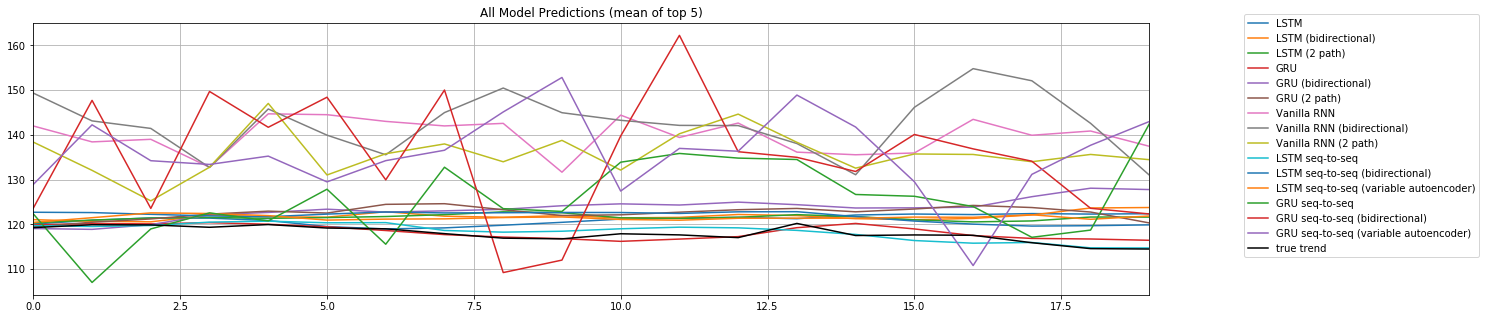

[96.6208563399141, 96.13179430254114, 96.54103368957803, 99.04122418342678, 94.1676772712347, 95.57307005930787, 81.08901589786049, 78.28347171743589, 84.20184985102561, 99.01458559157294, 96.50512483278035, 96.60238774707342, 90.09822030008901, 82.16566078306965, 82.94163194371104]


In [10]:
overall = [calculate_accuracy(df['4. close'].iloc[-test_size:].values, r) for r in a]
plt.figure(figsize = (20, 5))
plt.plot(a1, label = 'LSTM')
plt.plot(a2, label = 'LSTM (bidirectional)')
plt.plot(a3, label = 'LSTM (2 path)')
plt.plot(a4, label = 'GRU')
plt.plot(a5, label = 'GRU (bidirectional)')
plt.plot(a6, label = 'GRU (2 path)')
plt.plot(a7, label = 'Vanilla RNN')
plt.plot(a8, label = 'Vanilla RNN (bidirectional)')
plt.plot(a9, label = 'Vanilla RNN (2 path)')
plt.plot(a10, label = 'LSTM seq-to-seq')
plt.plot(a11, label = 'LSTM seq-to-seq (bidirectional)')
plt.plot(a12, label = 'LSTM seq-to-seq (variable autoencoder)')
plt.plot(a13, label = 'GRU seq-to-seq')
plt.plot(a14, label = 'GRU seq-to-seq (bidirectional)')
plt.plot(a15, label = 'GRU seq-to-seq (variable autoencoder)')
plt.plot(df['4. close'].iloc[-test_size:].values, label = 'true trend', c = 'black')
plt.legend(loc= 'upper right', bbox_to_anchor=(1.3, 1.05))
plt.title('All Model Predictions (mean of top 5)')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.show()
print(overall)

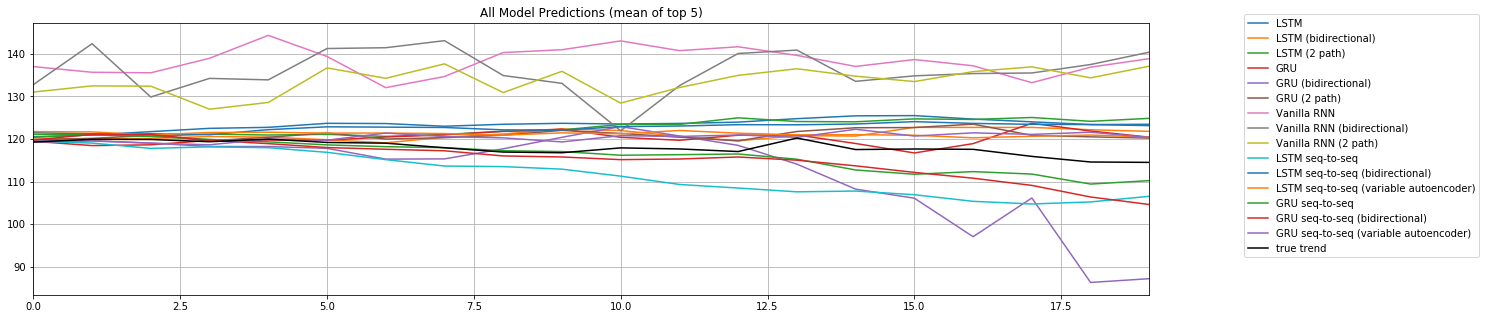

[94.89847909927128, 96.61006939093167, 95.13185144953307, 96.95680507014923, 90.51210138412972, 96.88705074639425, 82.43638758704898, 84.01087191343896, 86.23623616128859, 93.79114336144815, 95.4822954993264, 96.94354553772779, 97.40018725852137, 96.3698389850686, 97.13768991393086]


In [11]:
# LR 0.005
overall = [calculate_accuracy(df['4. close'].iloc[-test_size:].values, r) for r in a_lr]
plt.figure(figsize = (20, 5))
plt.plot(a1_lr, label = 'LSTM')
plt.plot(a2_lr, label = 'LSTM (bidirectional)')
plt.plot(a3_lr, label = 'LSTM (2 path)')
plt.plot(a4_lr, label = 'GRU')
plt.plot(a5_lr, label = 'GRU (bidirectional)')
plt.plot(a6_lr, label = 'GRU (2 path)')
plt.plot(a7_lr, label = 'Vanilla RNN')
plt.plot(a8_lr, label = 'Vanilla RNN (bidirectional)')
plt.plot(a9_lr, label = 'Vanilla RNN (2 path)')
plt.plot(a10_lr, label = 'LSTM seq-to-seq')
plt.plot(a11_lr, label = 'LSTM seq-to-seq (bidirectional)')
plt.plot(a12_lr, label = 'LSTM seq-to-seq (variable autoencoder)')
plt.plot(a13_lr, label = 'GRU seq-to-seq')
plt.plot(a14_lr, label = 'GRU seq-to-seq (bidirectional)')
plt.plot(a15_lr, label = 'GRU seq-to-seq (variable autoencoder)')
plt.plot(df['4. close'].iloc[-test_size:].values, label = 'true trend', c = 'black')
plt.legend(loc= 'upper right', bbox_to_anchor=(1.3, 1.05))
plt.title('All Model Predictions (mean of top 5)')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.show()
print(overall)

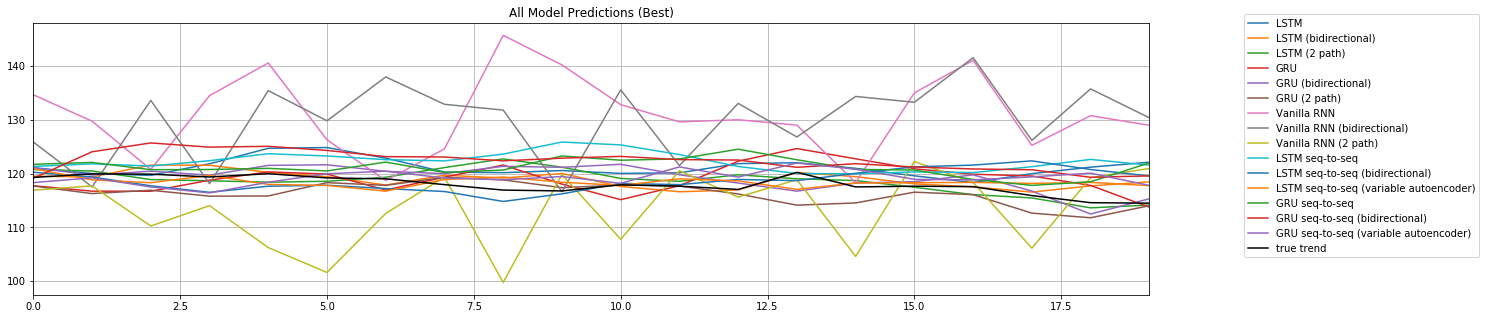

In [12]:
plt.figure(figsize = (20, 5))
plt.plot(best1_lr, label = 'LSTM')
plt.plot(best2_lr, label = 'LSTM (bidirectional)')
plt.plot(best3_lr, label = 'LSTM (2 path)')
plt.plot(best4_lr, label = 'GRU')
plt.plot(best5_lr, label = 'GRU (bidirectional)')
plt.plot(best6_lr, label = 'GRU (2 path)')
plt.plot(best7_lr, label = 'Vanilla RNN')
plt.plot(best8_lr, label = 'Vanilla RNN (bidirectional)')
plt.plot(best9_lr, label = 'Vanilla RNN (2 path)')
plt.plot(best10_lr, label = 'LSTM seq-to-seq')
plt.plot(best11_lr, label = 'LSTM seq-to-seq (bidirectional)')
plt.plot(best12_lr, label = 'LSTM seq-to-seq (variable autoencoder)')
plt.plot(best13_lr, label = 'GRU seq-to-seq')
plt.plot(best14_lr, label = 'GRU seq-to-seq (bidirectional)')
plt.plot(best15_lr, label = 'GRU seq-to-seq (variable autoencoder)')
plt.plot(df['4. close'].iloc[-test_size:].values, label = 'true trend', c = 'black')
plt.legend(loc= 'upper right', bbox_to_anchor=(1.3, 1.05))
plt.title('All Model Predictions (Best)')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.show()

In [13]:
def trend_classifier(test_pred, test_labels, test_size):
    classification = np.zeros(test_size-8)
    class_labels = np.zeros(test_size-8)
    for i in range(test_size-8):
        segment = test_labels.iloc[-(test_size + 1):].values[i:i+5:1]
        next_segment = test_labels.iloc[-(test_size + 1):].values[i+5:i+10:1]
        pred_segment = np.zeros(5)
        next_pred_segment = np.zeros(5)
        
        if i == 0:
            pred_segment[0] = test_labels.iloc[-(test_size + 1):].values[i]
            pred_segment[1:5] = test_pred[i:i+4:1]
            next_pred_segment = test_pred[i+4:i+9:1]
        
        else:
            pred_segment = test_pred[i-1:i+4:1]
            next_pred_segment = test_pred[i+4:i+9:1]
        
        if max(next_segment) > max(segment):
            class_labels[i] = 1
            
        else:
            class_labels[i] = 0
            
        if max(next_pred_segment) > max(pred_segment):
            classification[i] = 1
            
        else:
            classification[i] = 0
    
    x = np.arange(0, test_size-8, 1)
    plt.ylabel('Overall Trend')
    plt.autoscale(axis='x', tight=True)
    plt.plot(x,class_labels, label='Actual Price Trend')
    plt.plot(x,classification, label='Predicted Price Trend')
    plt.legend()
    plt.show()
    trend = (np.count_nonzero(class_labels == classification)/(test_size-8)) * 100
    return trend

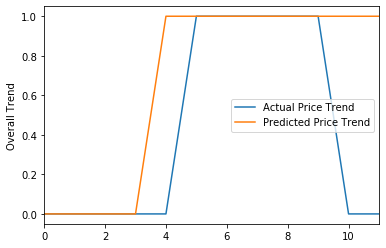

75.0

In [14]:
trend_classifier(a1, df['4. close'], test_size)

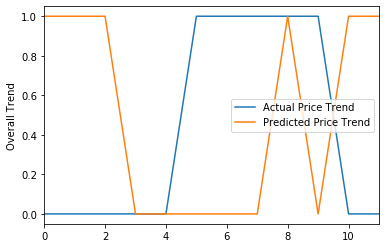

25.0

In [15]:
trend_classifier(a2, df['4. close'], test_size)

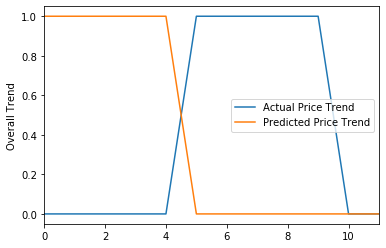

16.666666666666664

In [16]:
trend_classifier(a3, df['4. close'], test_size)

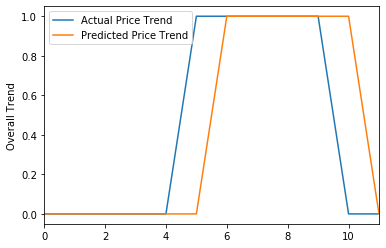

83.33333333333334

In [17]:
trend_classifier(a4, df['4. close'], test_size)

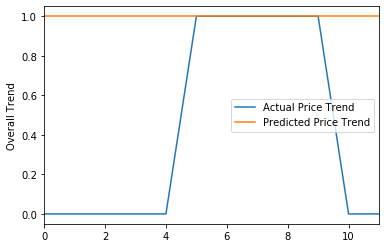

41.66666666666667

In [18]:
trend_classifier(a5, df['4. close'], test_size)

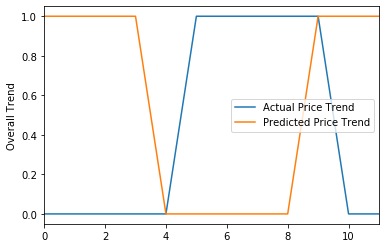

16.666666666666664

In [19]:
trend_classifier(a6, df['4. close'], test_size)

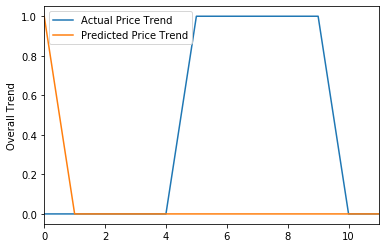

50.0

In [20]:
trend_classifier(a7, df['4. close'], test_size)

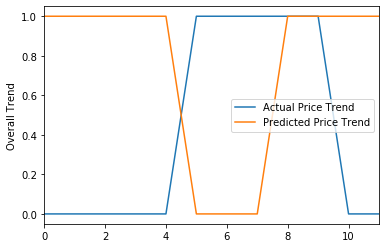

16.666666666666664

In [21]:
trend_classifier(a8, df['4. close'], test_size)

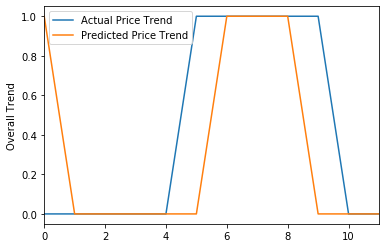

75.0

In [22]:
trend_classifier(a9, df['4. close'], test_size)

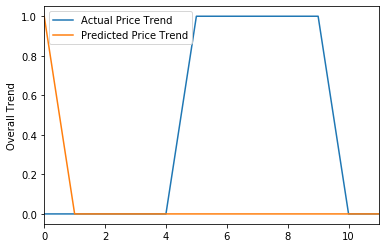

50.0

In [23]:
trend_classifier(a10, df['4. close'], test_size)

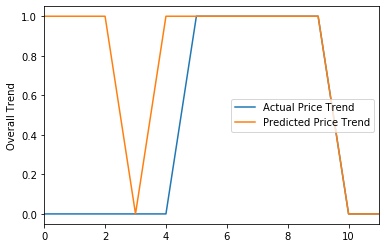

66.66666666666666

In [24]:
trend_classifier(a11, df['4. close'], test_size)

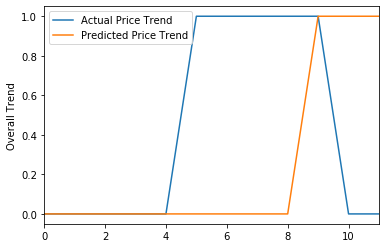

50.0

In [25]:
trend_classifier(a12, df['4. close'], test_size)

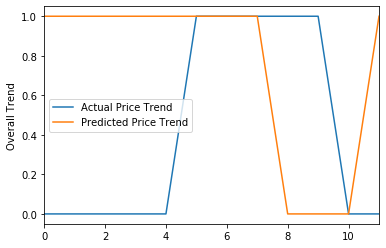

33.33333333333333

In [26]:
trend_classifier(a13, df['4. close'], test_size)

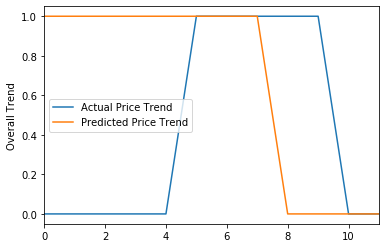

41.66666666666667

In [27]:
trend_classifier(a14, df['4. close'], test_size)

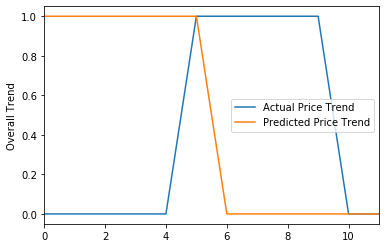

25.0

In [28]:
trend_classifier(a15, df['4. close'], test_size)

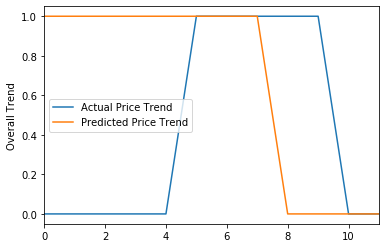

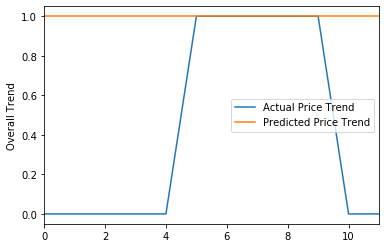

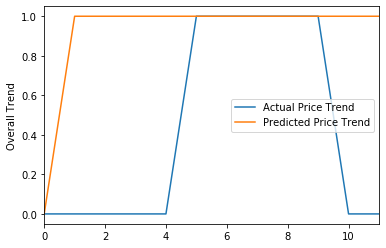

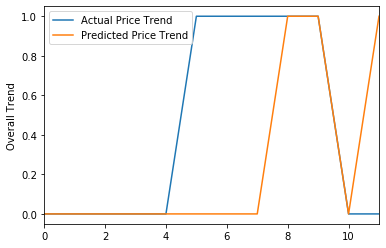

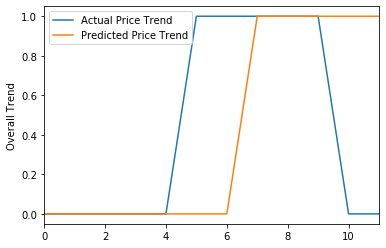

53.33333333333333


array([41.66666667, 41.66666667, 50.        , 66.66666667, 66.66666667])

In [29]:
trend_acc1 = np.zeros(5)
for i in range(5):
    trend_acc1[i] = trend_classifier(results[i], df['4. close'], test_size)
print(np.mean(trend_acc1))
trend_acc1

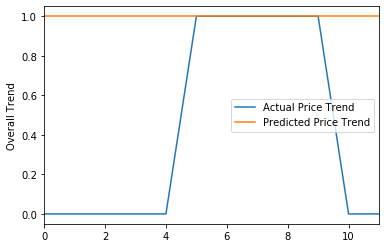

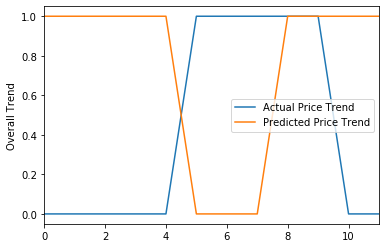

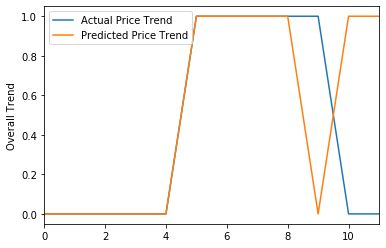

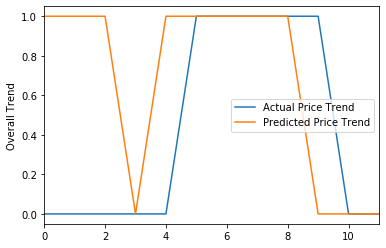

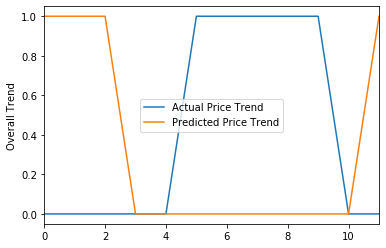

43.333333333333336


array([41.66666667, 16.66666667, 75.        , 58.33333333, 25.        ])

In [30]:
trend_acc2 = np.zeros(5)
for i in range(5):
    trend_acc2[i] = trend_classifier(results2[i], df['4. close'], test_size)
print(np.mean(trend_acc2))
trend_acc2

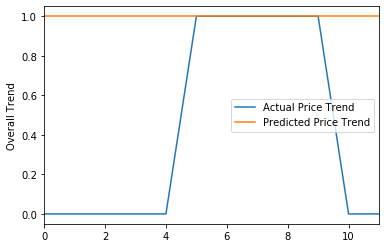

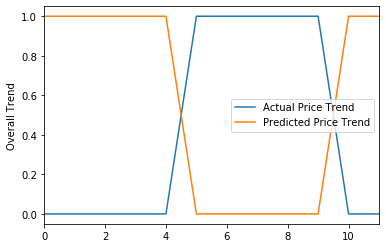

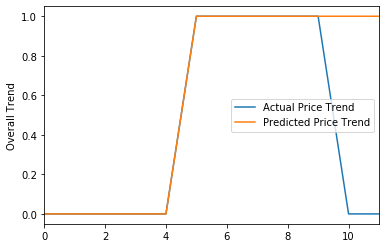

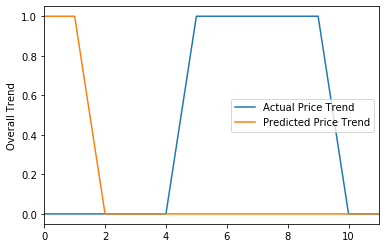

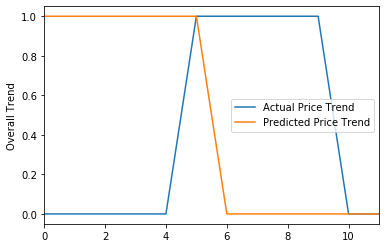

38.333333333333336


array([41.66666667,  0.        , 83.33333333, 41.66666667, 25.        ])

In [31]:
trend_acc3 = np.zeros(5)
for i in range(5):
    trend_acc3[i] = trend_classifier(results3[i], df['4. close'], test_size)
print(np.mean(trend_acc3))
trend_acc3

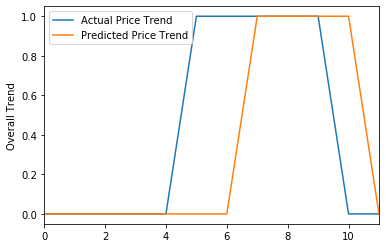

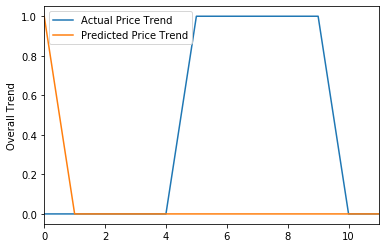

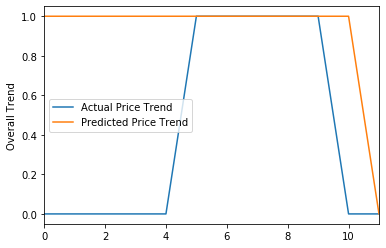

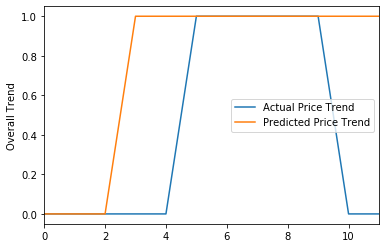

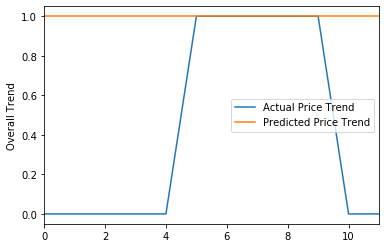

56.666666666666664


array([75.        , 50.        , 50.        , 66.66666667, 41.66666667])

In [32]:
trend_acc4 = np.zeros(5)
for i in range(5):
    trend_acc4[i] = trend_classifier(results4[i], df['4. close'], test_size)
print(np.mean(trend_acc4))
trend_acc4

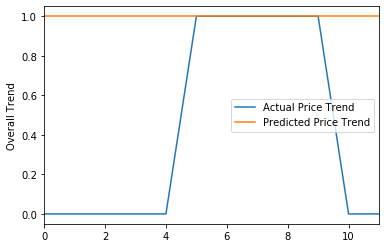

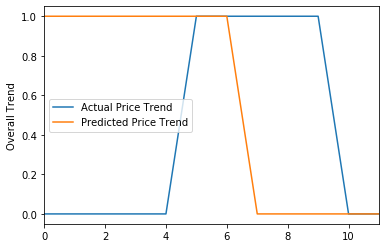

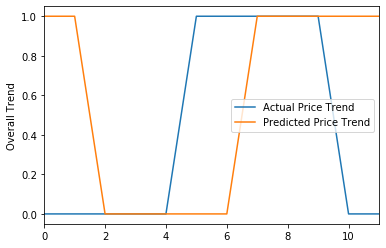

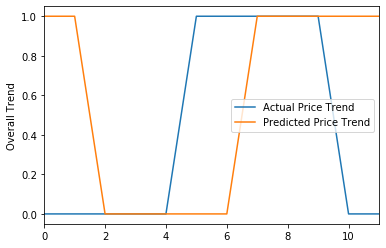

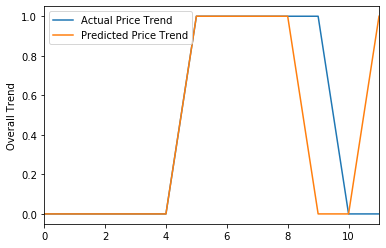

51.66666666666667


array([41.66666667, 33.33333333, 50.        , 50.        , 83.33333333])

In [33]:
trend_acc5 = np.zeros(5)
for i in range(5):
    trend_acc5[i] = trend_classifier(results5[i], df['4. close'], test_size)
print(np.mean(trend_acc5))
trend_acc5

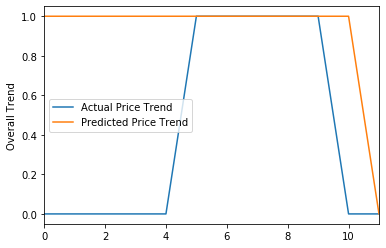

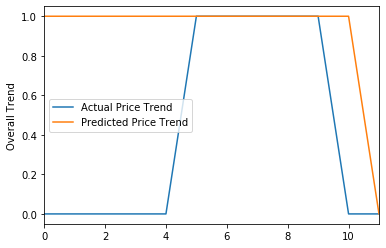

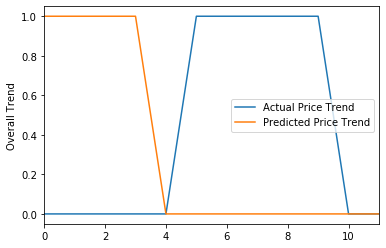

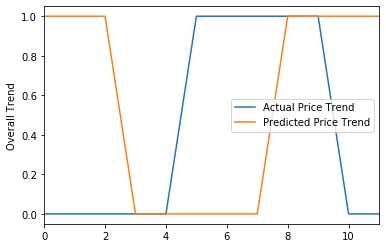

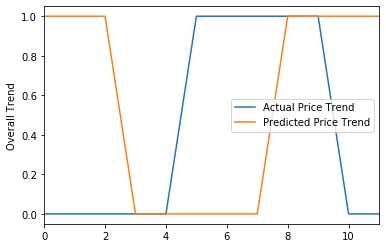

38.33333333333333


array([50.        , 50.        , 25.        , 33.33333333, 33.33333333])

In [34]:
trend_acc6 = np.zeros(5)
for i in range(5):
    trend_acc6[i] = trend_classifier(results6[i], df['4. close'], test_size)
print(np.mean(trend_acc6))
trend_acc6

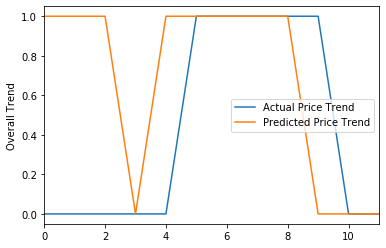

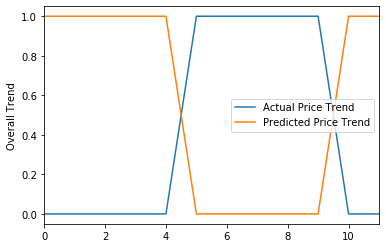

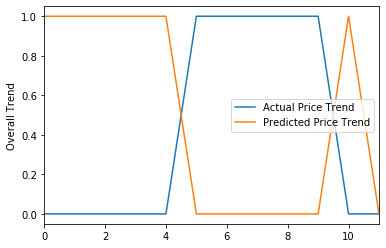

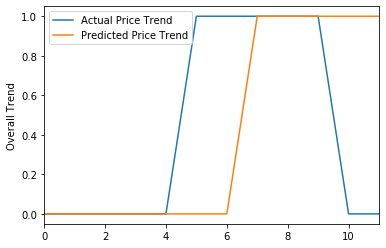

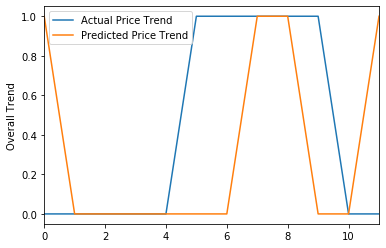

38.33333333333333


array([58.33333333,  0.        ,  8.33333333, 66.66666667, 58.33333333])

In [35]:
trend_acc7 = np.zeros(5)
for i in range(5):
    trend_acc7[i] = trend_classifier(results7[i], df['4. close'], test_size)
print(np.mean(trend_acc7))
trend_acc7

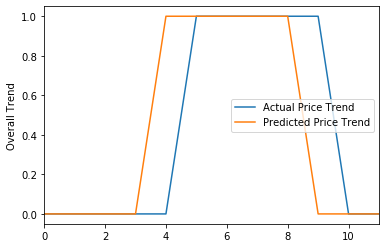

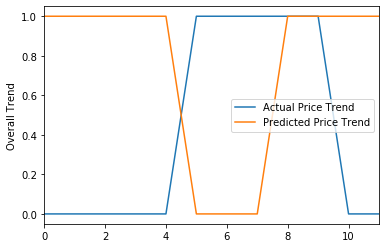

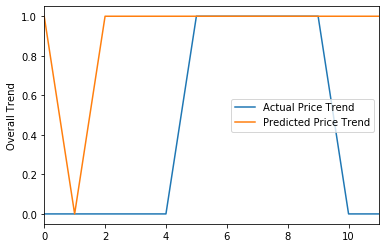

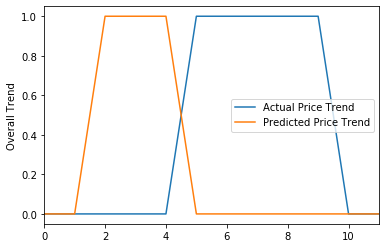

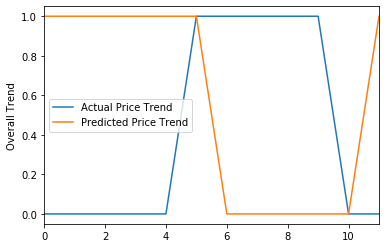

39.99999999999999


array([83.33333333, 16.66666667, 50.        , 33.33333333, 16.66666667])

In [36]:
trend_acc8 = np.zeros(5)
for i in range(5):
    trend_acc8[i] = trend_classifier(results8[i], df['4. close'], test_size)
print(np.mean(trend_acc8))
trend_acc8

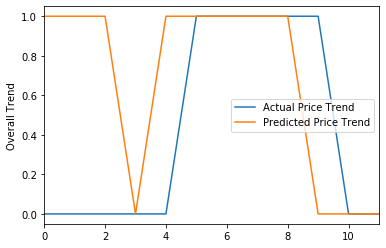

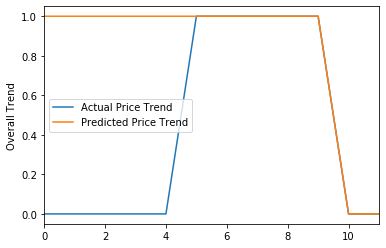

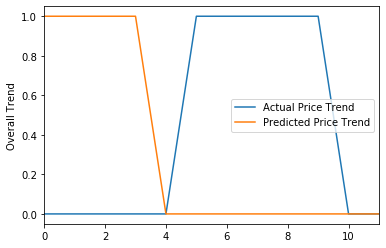

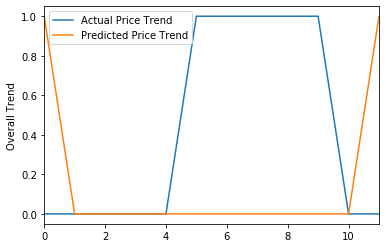

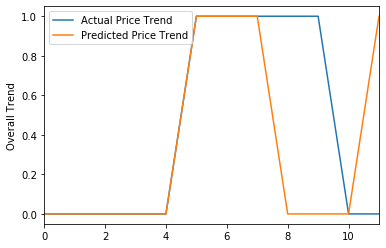

51.66666666666667


array([58.33333333, 58.33333333, 25.        , 41.66666667, 75.        ])

In [37]:
trend_acc9 = np.zeros(5)
for i in range(5):
    trend_acc9[i] = trend_classifier(results9[i], df['4. close'], test_size)
print(np.mean(trend_acc9))
trend_acc9

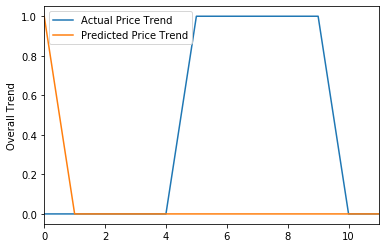

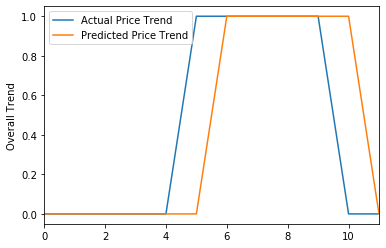

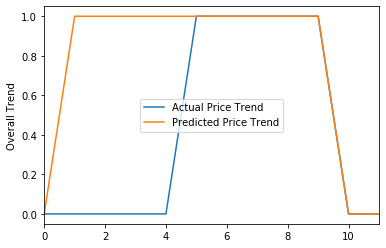

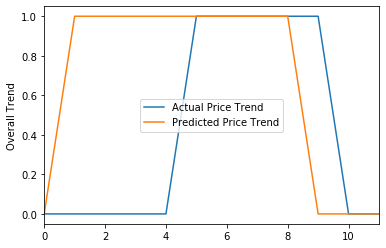

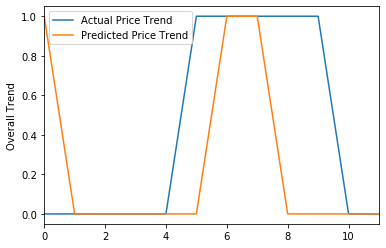

65.0


array([50.        , 83.33333333, 66.66666667, 58.33333333, 66.66666667])

In [38]:
trend_acc10 = np.zeros(5)
for i in range(5):
    trend_acc10[i] = trend_classifier(results10[i], df['4. close'], test_size)
print(np.mean(trend_acc10))
trend_acc10

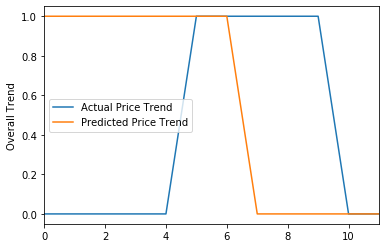

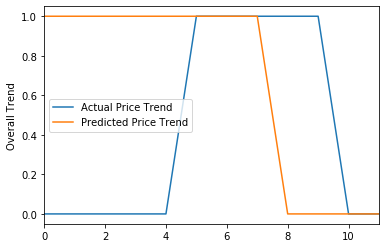

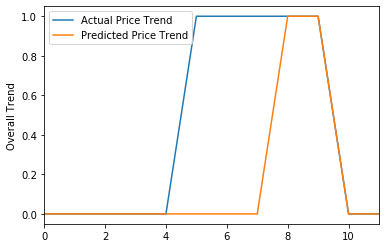

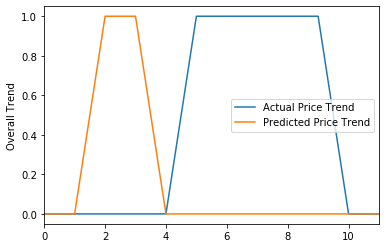

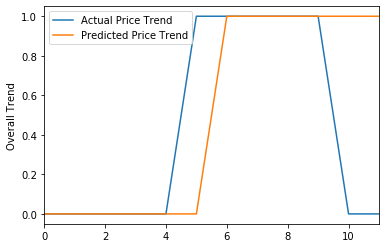

53.333333333333336


array([33.33333333, 41.66666667, 75.        , 41.66666667, 75.        ])

In [39]:
trend_acc11 = np.zeros(5)
for i in range(5):
    trend_acc11[i] = trend_classifier(results11[i], df['4. close'], test_size)
print(np.mean(trend_acc11))
trend_acc11

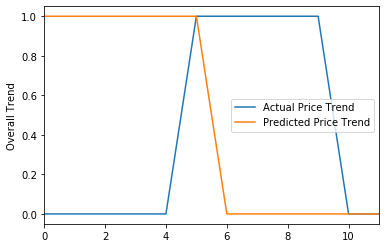

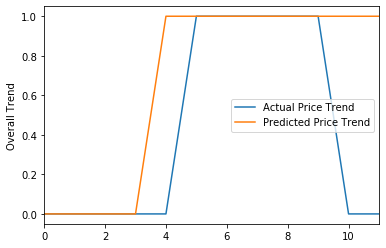

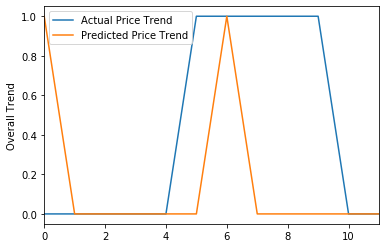

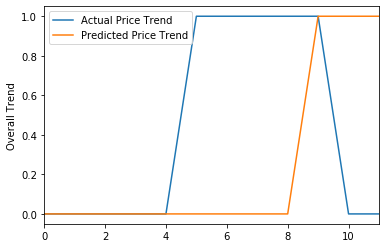

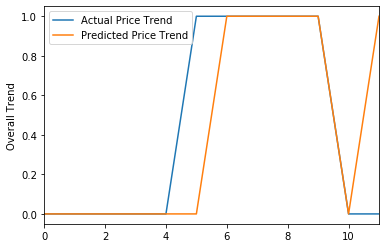

58.333333333333336


array([25.        , 75.        , 58.33333333, 50.        , 83.33333333])

In [40]:
trend_acc12 = np.zeros(5)
for i in range(5):
    trend_acc12[i] = trend_classifier(results12[i], df['4. close'], test_size)
print(np.mean(trend_acc12))
trend_acc12

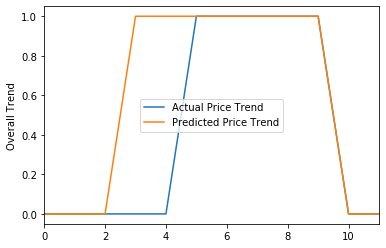

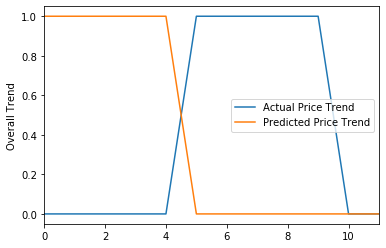

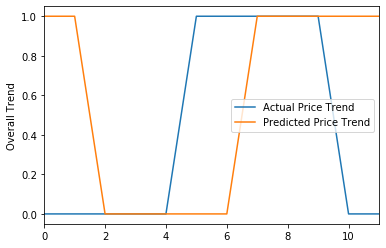

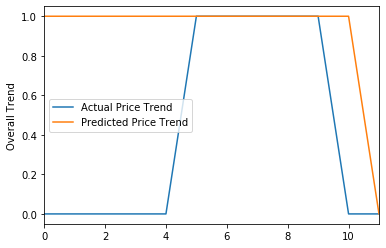

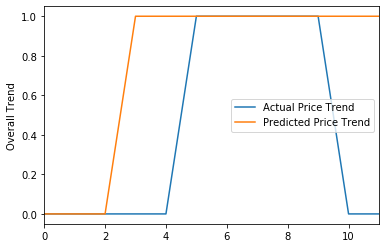

53.33333333333333


array([83.33333333, 16.66666667, 50.        , 50.        , 66.66666667])

In [41]:
trend_acc13 = np.zeros(5)
for i in range(5):
    trend_acc13[i] = trend_classifier(results13[i], df['4. close'], test_size)
print(np.mean(trend_acc13))
trend_acc13

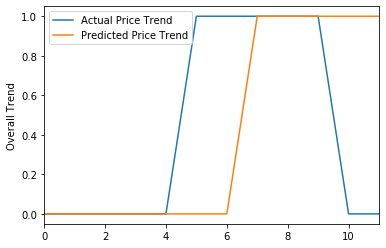

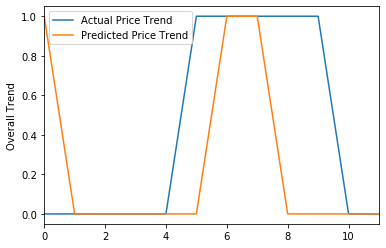

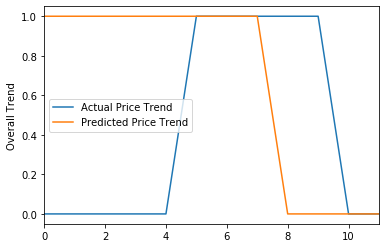

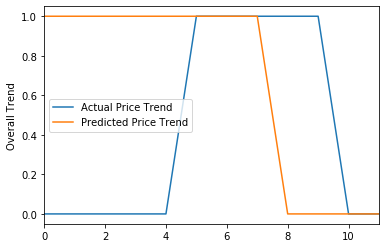

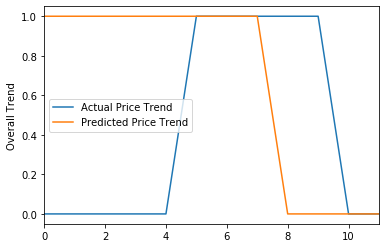

51.66666666666667


array([66.66666667, 66.66666667, 41.66666667, 41.66666667, 41.66666667])

In [42]:
trend_acc14 = np.zeros(5)
for i in range(5):
    trend_acc14[i] = trend_classifier(results14[i], df['4. close'], test_size)
print(np.mean(trend_acc14))
trend_acc14

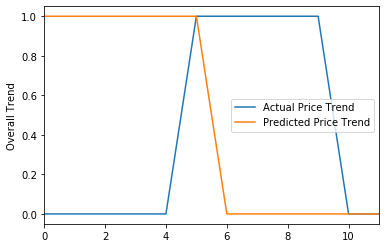

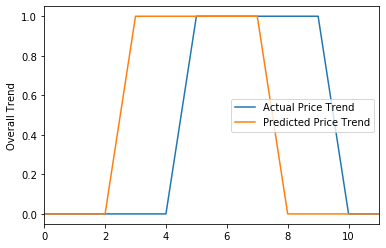

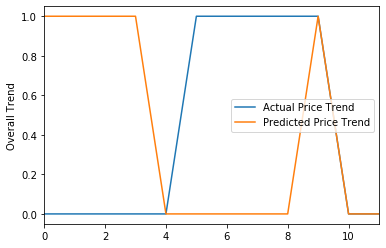

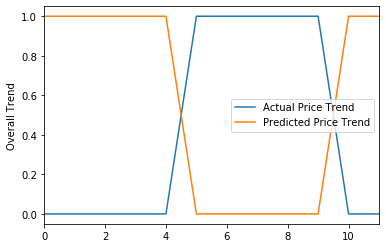

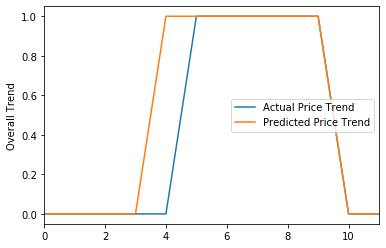

43.33333333333333


array([25.        , 66.66666667, 33.33333333,  0.        , 91.66666667])

In [43]:
trend_acc15 = np.zeros(5)
for i in range(5):
    trend_acc15[i] = trend_classifier(results15[i], df['4. close'], test_size)
print(np.mean(trend_acc15))
trend_acc15

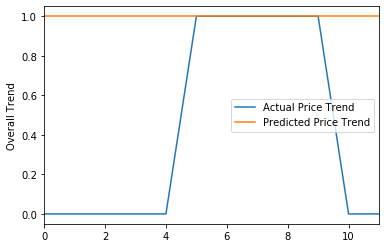

41.66666666666667

In [44]:
trend_classifier(a1_lr, df['4. close'], test_size)

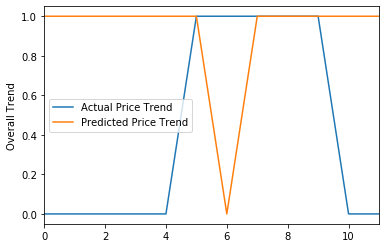

33.33333333333333

In [45]:
trend_classifier(a2_lr, df['4. close'], test_size)

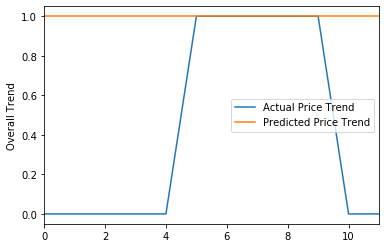

41.66666666666667

In [46]:
trend_classifier(a3_lr, df['4. close'], test_size)

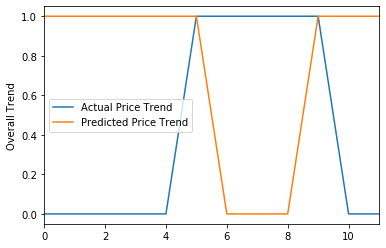

16.666666666666664

In [47]:
trend_classifier(a4_lr, df['4. close'], test_size)

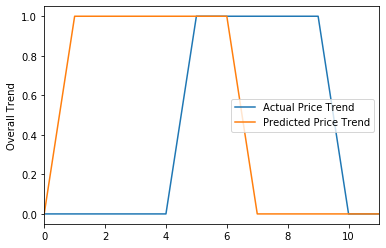

41.66666666666667

In [48]:
trend_classifier(a5_lr, df['4. close'], test_size)

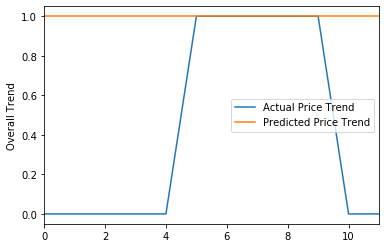

41.66666666666667

In [49]:
trend_classifier(a6_lr, df['4. close'], test_size)

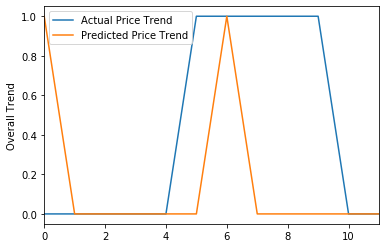

58.333333333333336

In [50]:
trend_classifier(a7_lr, df['4. close'], test_size)

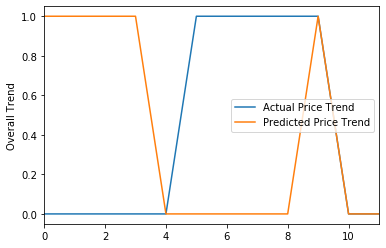

33.33333333333333

In [51]:
trend_classifier(a8_lr, df['4. close'], test_size)

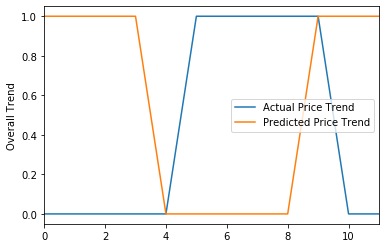

16.666666666666664

In [52]:
trend_classifier(a9_lr, df['4. close'], test_size)

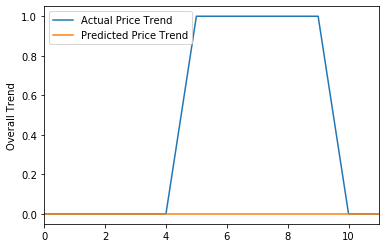

58.333333333333336

In [53]:
trend_classifier(a10_lr, df['4. close'], test_size)

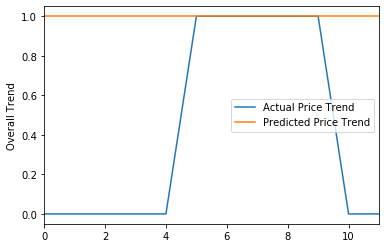

41.66666666666667

In [54]:
trend_classifier(a11_lr, df['4. close'], test_size)

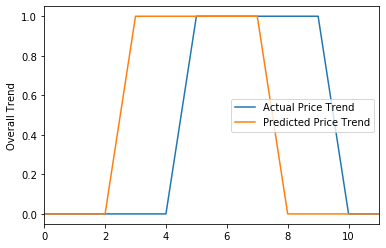

66.66666666666666

In [55]:
trend_classifier(a12_lr, df['4. close'], test_size)

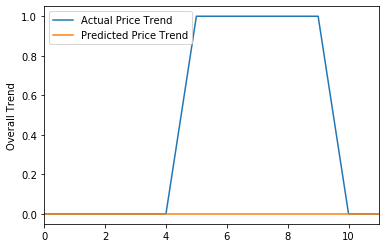

58.333333333333336

In [56]:
trend_classifier(a13_lr, df['4. close'], test_size)

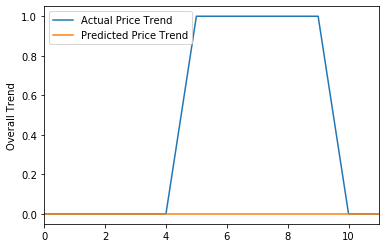

58.333333333333336

In [57]:
trend_classifier(a14_lr, df['4. close'], test_size)

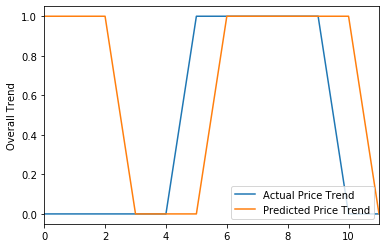

58.333333333333336

In [58]:
trend_classifier(a15_lr, df['4. close'], test_size)

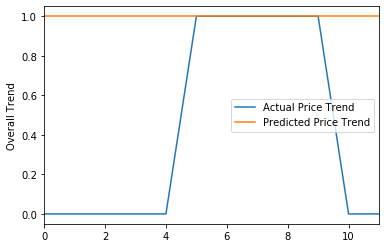

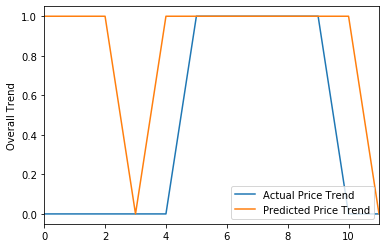

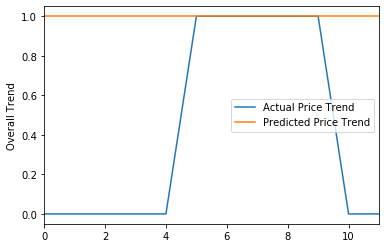

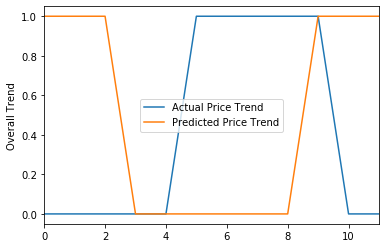

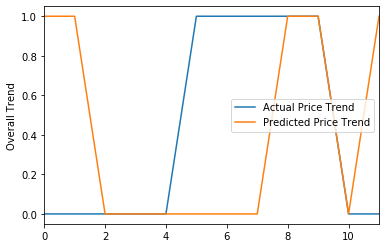

43.333333333333336


array([41.66666667, 58.33333333, 41.66666667, 25.        , 50.        ])

In [59]:
trend_acc1_lr = np.zeros(5)
for i in range(5):
    trend_acc1_lr[i] = trend_classifier(results_lr[i], df['4. close'], test_size)
print(np.mean(trend_acc1_lr))
trend_acc1_lr

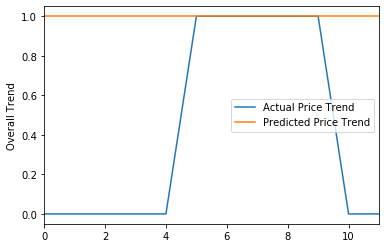

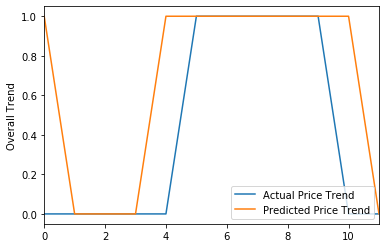

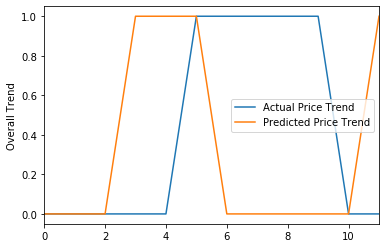

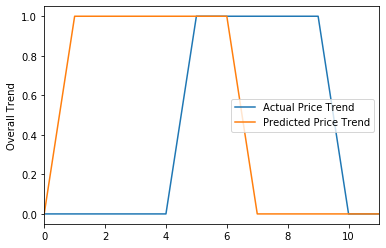

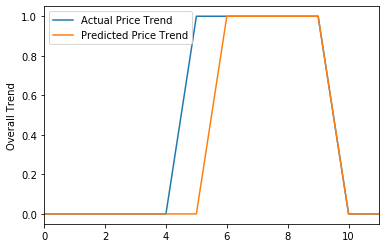

58.33333333333333


array([41.66666667, 75.        , 41.66666667, 41.66666667, 91.66666667])

In [60]:
trend_acc2_lr = np.zeros(5)
for i in range(5):
    trend_acc2_lr[i] = trend_classifier(results2_lr[i], df['4. close'], test_size)
print(np.mean(trend_acc2_lr))
trend_acc2_lr

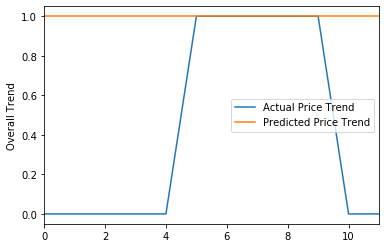

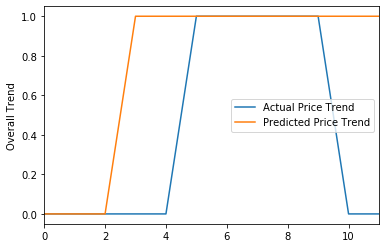

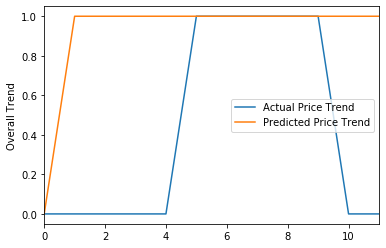

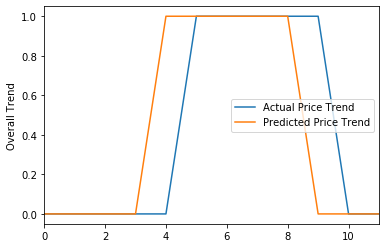

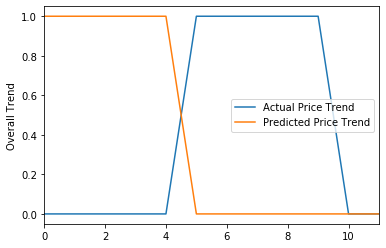

51.666666666666664


array([41.66666667, 66.66666667, 50.        , 83.33333333, 16.66666667])

In [61]:
trend_acc3_lr = np.zeros(5)
for i in range(5):
    trend_acc3_lr[i] = trend_classifier(results3_lr[i], df['4. close'], test_size)
print(np.mean(trend_acc3_lr))
trend_acc3_lr

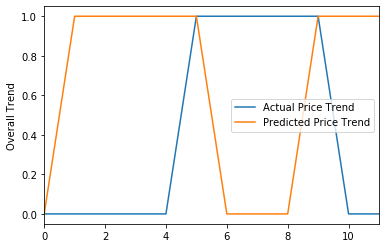

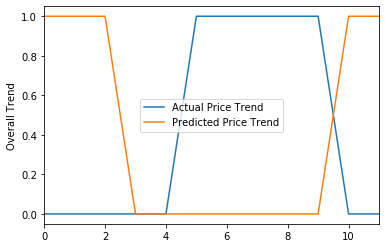

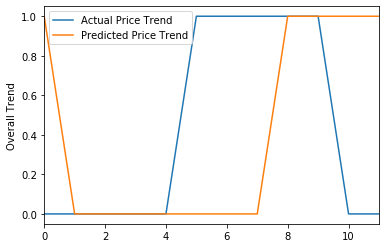

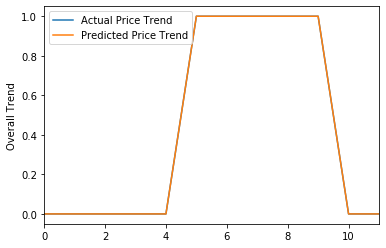

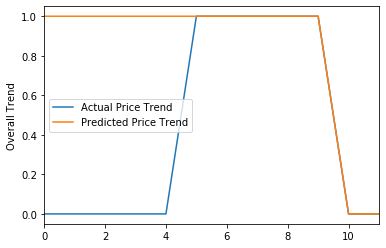

50.0


array([ 25.        ,  16.66666667,  50.        , 100.        ,
        58.33333333])

In [62]:
trend_acc4_lr = np.zeros(5)
for i in range(5):
    trend_acc4_lr[i] = trend_classifier(results4_lr[i], df['4. close'], test_size)
print(np.mean(trend_acc4_lr))
trend_acc4_lr

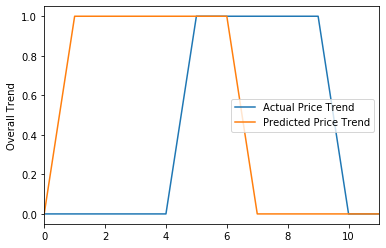

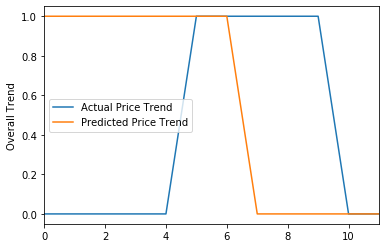

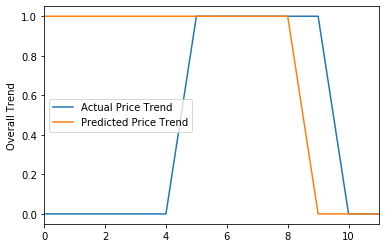

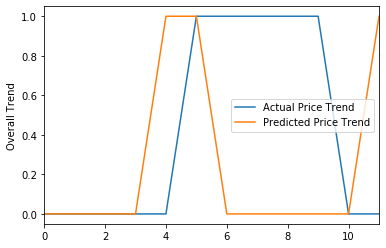

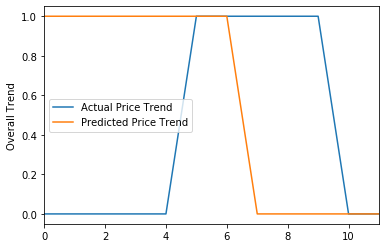

41.666666666666664


array([41.66666667, 33.33333333, 50.        , 50.        , 33.33333333])

In [63]:
trend_acc5_lr = np.zeros(5)
for i in range(5):
    trend_acc5_lr[i] = trend_classifier(results5_lr[i], df['4. close'], test_size)
print(np.mean(trend_acc5_lr))
trend_acc5_lr

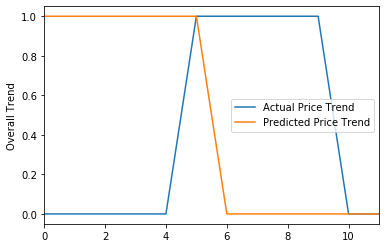

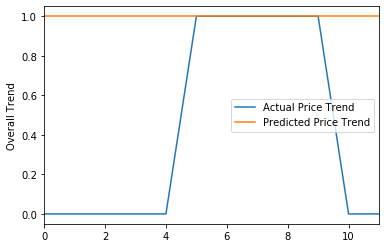

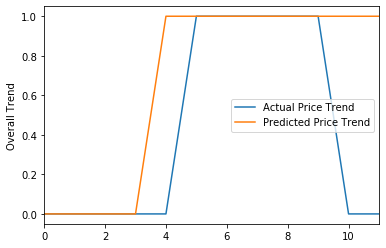

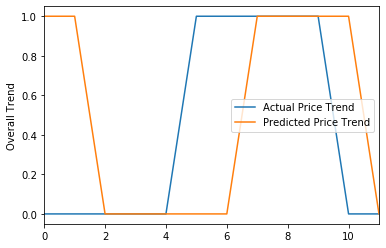

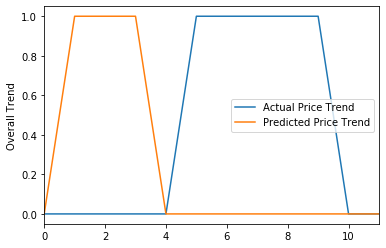

46.66666666666667


array([25.        , 41.66666667, 75.        , 58.33333333, 33.33333333])

In [64]:
trend_acc6_lr = np.zeros(5)
for i in range(5):
    trend_acc6_lr[i] = trend_classifier(results6_lr[i], df['4. close'], test_size)
print(np.mean(trend_acc6_lr))
trend_acc6_lr

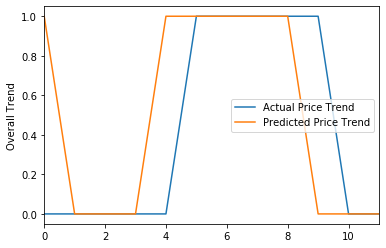

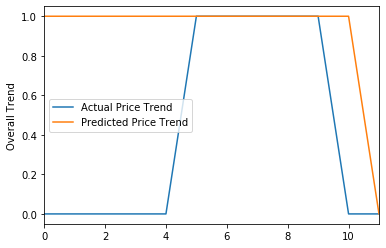

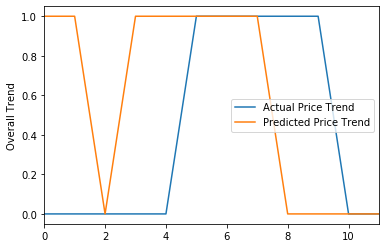

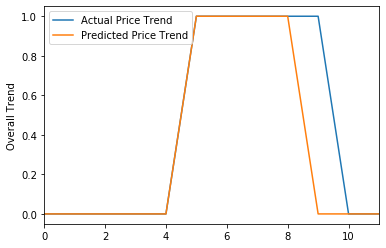

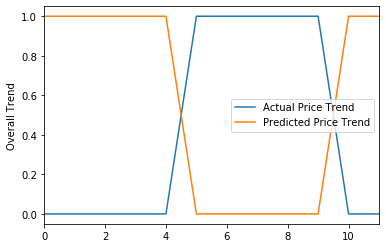

53.33333333333333


array([75.        , 50.        , 50.        , 91.66666667,  0.        ])

In [65]:
trend_acc7_lr = np.zeros(5)
for i in range(5):
    trend_acc7_lr[i] = trend_classifier(results7_lr[i], df['4. close'], test_size)
print(np.mean(trend_acc7_lr))
trend_acc7_lr

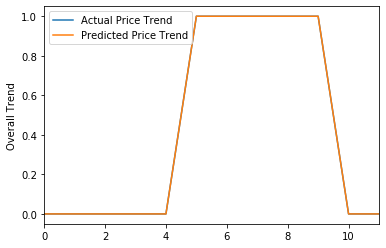

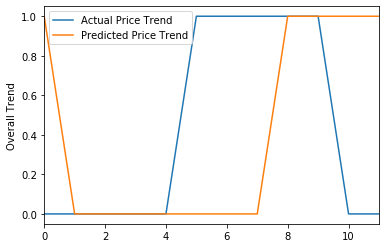

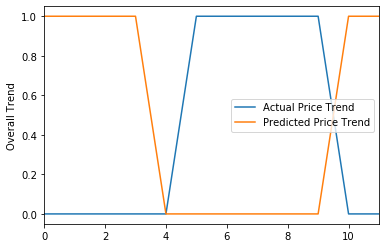

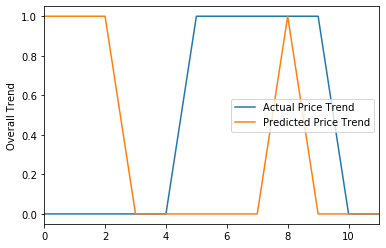

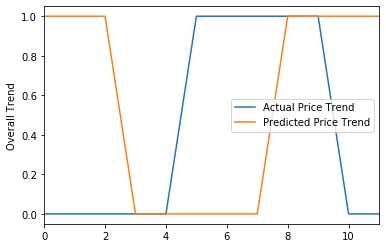

46.666666666666664


array([100.        ,  50.        ,   8.33333333,  41.66666667,
        33.33333333])

In [66]:
trend_acc8_lr = np.zeros(5)
for i in range(5):
    trend_acc8_lr[i] = trend_classifier(results8_lr[i], df['4. close'], test_size)
print(np.mean(trend_acc8_lr))
trend_acc8_lr

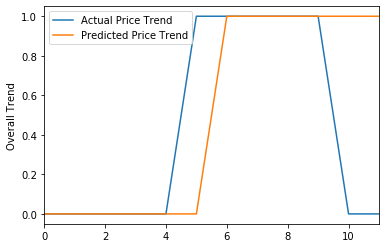

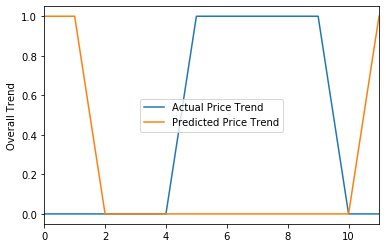

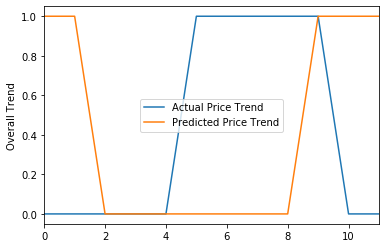

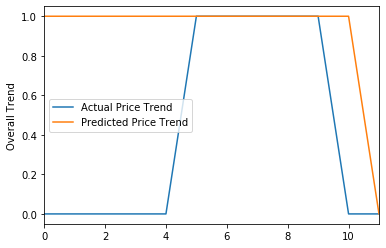

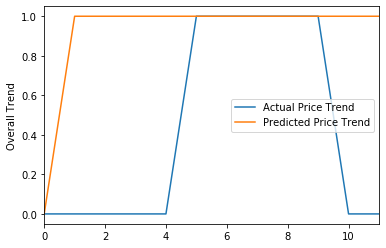

48.33333333333333


array([75.        , 33.33333333, 33.33333333, 50.        , 50.        ])

In [67]:
trend_acc9_lr = np.zeros(5)
for i in range(5):
    trend_acc9_lr[i] = trend_classifier(results9_lr[i], df['4. close'], test_size)
print(np.mean(trend_acc9_lr))
trend_acc9_lr

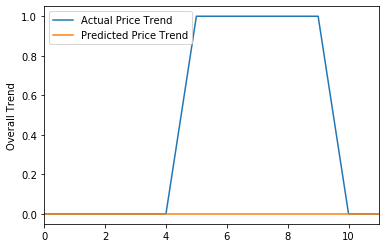

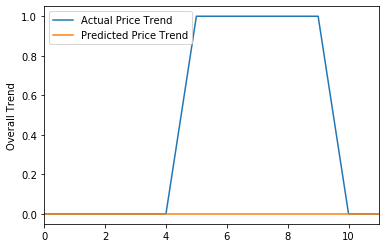

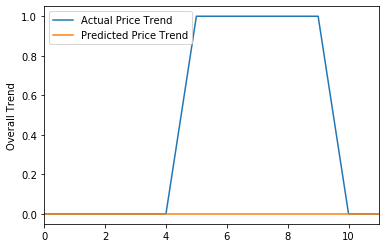

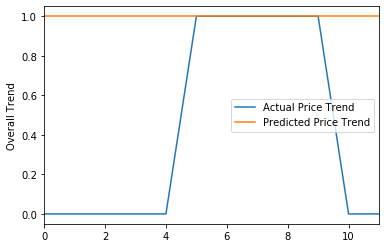

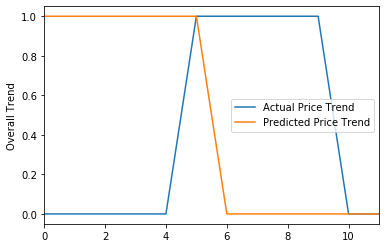

48.333333333333336


array([58.33333333, 58.33333333, 58.33333333, 41.66666667, 25.        ])

In [68]:
trend_acc10_lr = np.zeros(5)
for i in range(5):
    trend_acc10_lr[i] = trend_classifier(results10_lr[i], df['4. close'], test_size)
print(np.mean(trend_acc10_lr))
trend_acc10_lr

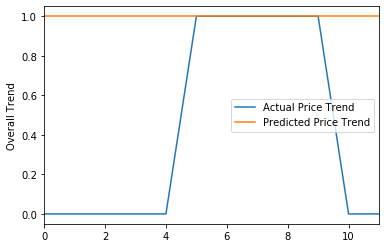

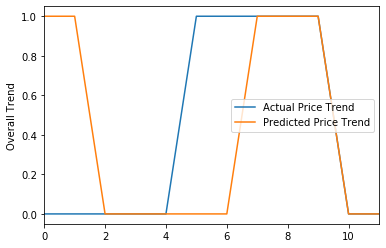

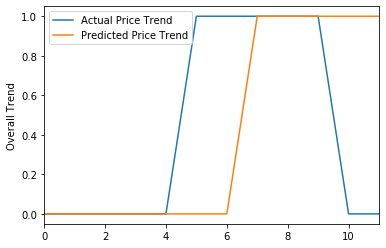

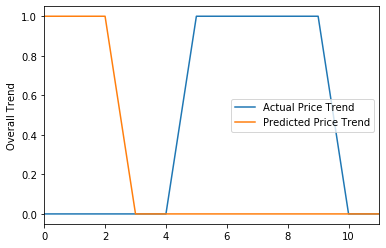

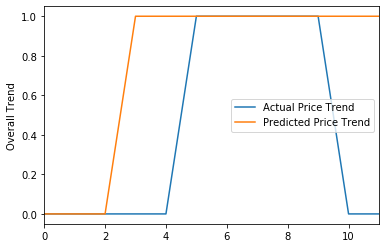

55.0


array([41.66666667, 66.66666667, 66.66666667, 33.33333333, 66.66666667])

In [69]:
trend_acc11_lr = np.zeros(5)
for i in range(5):
    trend_acc11_lr[i] = trend_classifier(results11_lr[i], df['4. close'], test_size)
print(np.mean(trend_acc11_lr))
trend_acc11_lr

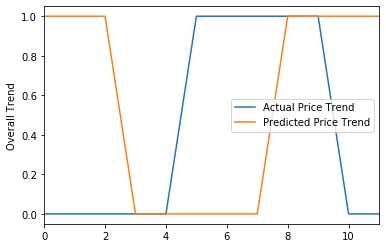

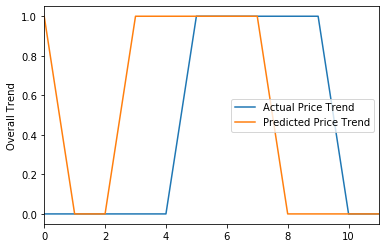

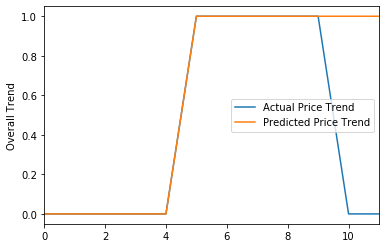

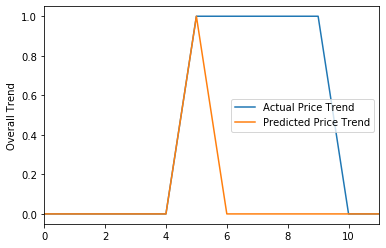

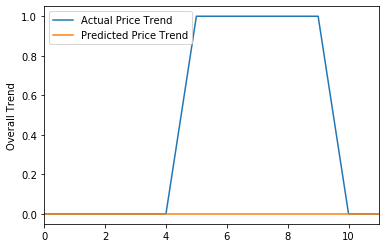

60.0


array([33.33333333, 58.33333333, 83.33333333, 66.66666667, 58.33333333])

In [70]:
trend_acc12_lr = np.zeros(5)
for i in range(5):
    trend_acc12_lr[i] = trend_classifier(results12_lr[i], df['4. close'], test_size)
print(np.mean(trend_acc12_lr))
trend_acc12_lr

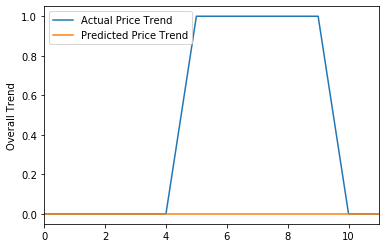

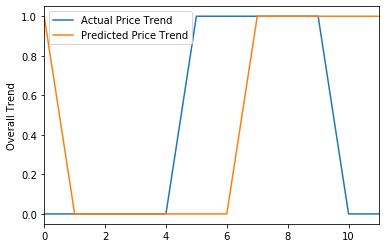

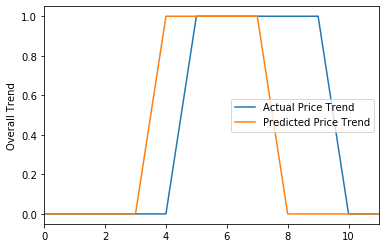

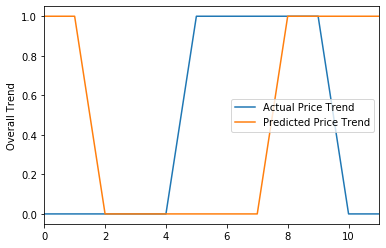

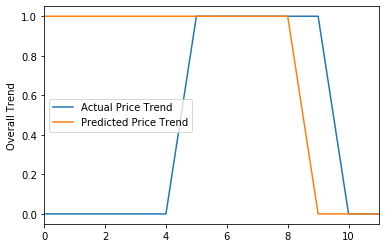

56.66666666666667


array([58.33333333, 58.33333333, 75.        , 41.66666667, 50.        ])

In [71]:
trend_acc13_lr = np.zeros(5)
for i in range(5):
    trend_acc13_lr[i] = trend_classifier(results13_lr[i], df['4. close'], test_size)
print(np.mean(trend_acc13_lr))
trend_acc13_lr

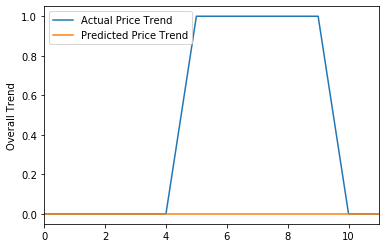

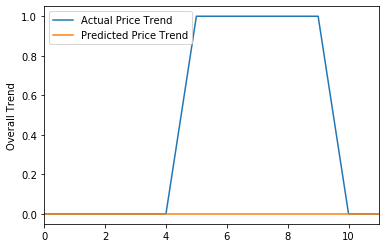

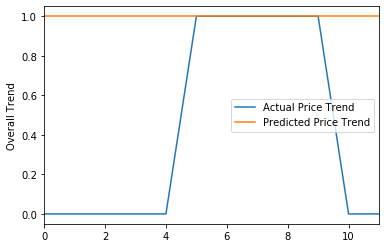

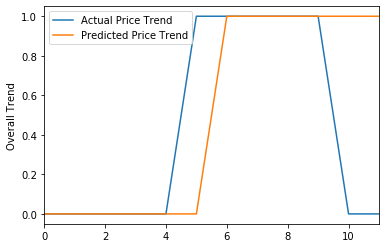

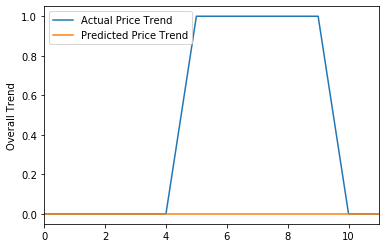

58.333333333333336


array([58.33333333, 58.33333333, 41.66666667, 75.        , 58.33333333])

In [72]:
trend_acc14_lr = np.zeros(5)
for i in range(5):
    trend_acc14_lr[i] = trend_classifier(results14_lr[i], df['4. close'], test_size)
print(np.mean(trend_acc14_lr))
trend_acc14_lr

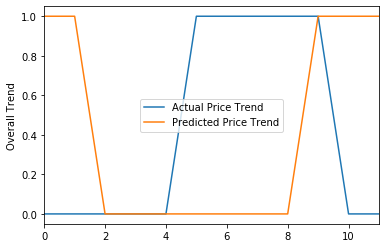

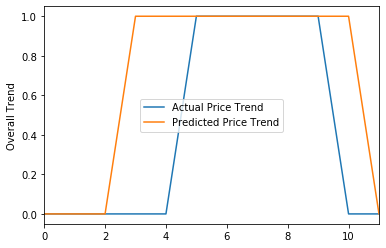

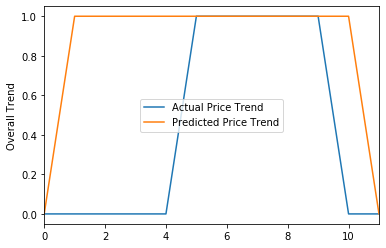

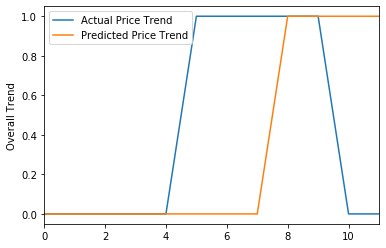

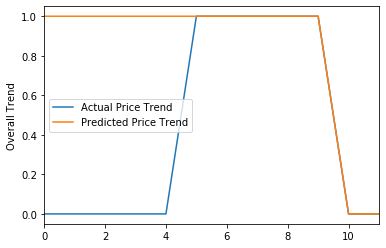

56.666666666666664


array([33.33333333, 75.        , 58.33333333, 58.33333333, 58.33333333])

In [73]:
trend_acc15_lr = np.zeros(5)
for i in range(5):
    trend_acc15_lr[i] = trend_classifier(results15_lr[i], df['4. close'], test_size)
print(np.mean(trend_acc15_lr))
trend_acc15_lr